 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [50]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [51]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
## aapl_historical_csv = Path("../Resources/aapl_historical.csv")
## algo_returns_csv = Path("../Resources/algo_returns.csv")
## cost_historical_csv = Path("../Resources/cost_historical.csv")
## goog_historical_csv = Path("../Resources/goog_historical.csv")
## sp500_history_csv = Path("../Resources/sp500_history.csv")
whale_returns_csv = Path("../Resources/whale_returns.csv")

## aapl_df = pd.read_csv(aapl_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
## algo_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
## cost_df = pd.read_csv(cost_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
## goog_df = pd.read_csv(goog_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
## sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [52]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [53]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace = True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [54]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE

algo_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [55]:
# Count nulls
# YOUR CODE HERE

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [56]:
# Drop nulls
# YOUR CODE HERE

algo_df.dropna(inplace = True)

algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [57]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [58]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [59]:
# Fix Data Types
# YOUR CODE HERE
sp500_df["Close"] = sp500_df["Close"].str.replace("$","").astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [60]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_df["Close"] = sp500_df["Close"].pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [61]:
# Drop nulls
# YOUR CODE HERE
sp500_df.dropna(inplace = True)

sp500_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [62]:
# Rename Column
# YOUR CODE HERE
sp500_df.rename(columns={"Close": "S&P 500"}, inplace=True)
sp500_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [63]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis=1 , join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

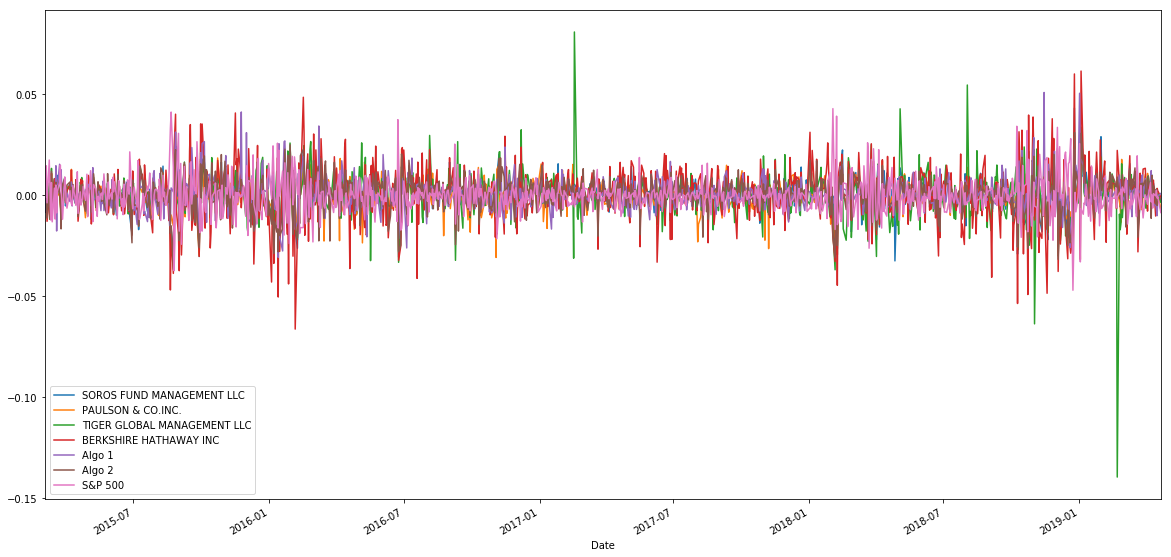

In [64]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(20,10))


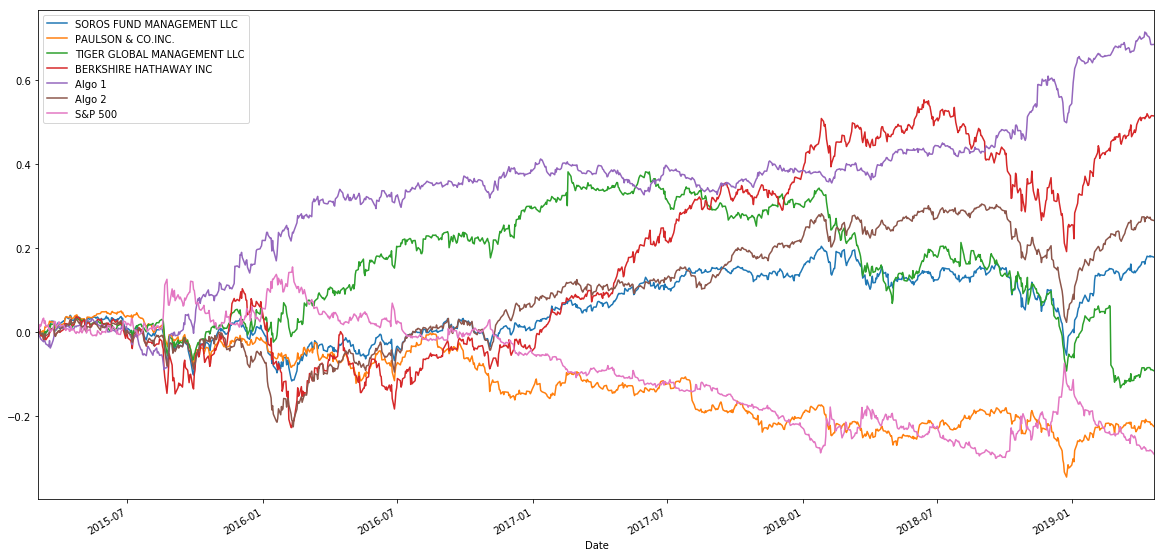

In [65]:
# Plot cumulative returns
# YOUR CODE HERE
combined_df.cumsum().plot(figsize=(20,10))


---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [66]:
# Returns by Year
# YOUR CODE HERE
yearly_returns =combined_df.groupby([combined_df.index.year]).sum()
yearly_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015,0.003612,-0.020215,0.034808,0.050841,0.218207,-0.060092,0.056741
2016,0.001008,-0.118263,0.258866,-0.096697,0.165273,0.119528,-0.106445
2017,0.137685,-0.067871,0.007946,0.409339,0.000170,0.154322,-0.175015
2018,-0.142244,-0.110971,-0.362566,-0.107804,0.160558,-0.142150,0.085912
2019,0.177662,0.090699,-0.032176,0.258830,0.141069,0.193574,-0.153488


In [67]:
# Top Portfolio returns for 2017
# YOUR CODE HERE
yearly_returns.loc[2017].sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.409339
Algo 2                         0.154322
SOROS FUND MANAGEMENT LLC      0.137685
TIGER GLOBAL MANAGEMENT LLC    0.007946
Algo 1                         0.000170
PAULSON & CO.INC.             -0.067871
S&P 500                       -0.175015
Name: 2017, dtype: float64

In [68]:
# Returns by Month
# YOUR CODE HERE
monthly_returns = combined_df.groupby([combined_df.index.year,combined_df.index.month]).sum()
monthly_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date Date                                                  
2015 3                      0.017399            0.011460   
     4                      0.003429            0.016945   
     5                      0.008288            0.019671   
     6                     -0.020117           -0.011392   
     7                     -0.014358           -0.018263   

           TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date Date                                                                  
2015 3                        0.009830                0.002815  0.013329   
     4                        0.010557                0.012214 -0.007049   
     5                       -0.001220                0.001365  0.009668   
     6                       -0.022959               -0.019760 -0.003035   
     7                        0.020379               -0.020971 -0.052142   

             Algo 2   S&P 500  
Date Date                      
2015 3    -0.000489  0.023921  
     4     0.009861 -0.022983  
     5     0.001191 -0.001245  
     6    -0.009515  0.016934  
     7    -0.016164 -0.009317

In [69]:
# Top Portfolio Returns for December 2018
# YOUR CODE HERE
combined_df_dec = combined_df.groupby([combined_df.index.year,combined_df.index.month]).sum()
combined_df_dec.loc[2018,12].sort_values(ascending=False)

S&P 500                        0.109207
Algo 1                        -0.055459
BERKSHIRE HATHAWAY INC        -0.089051
PAULSON & CO.INC.             -0.094337
SOROS FUND MANAGEMENT LLC     -0.097989
Algo 2                        -0.124434
TIGER GLOBAL MANAGEMENT LLC   -0.152859
Name: (2018, 12), dtype: float64

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

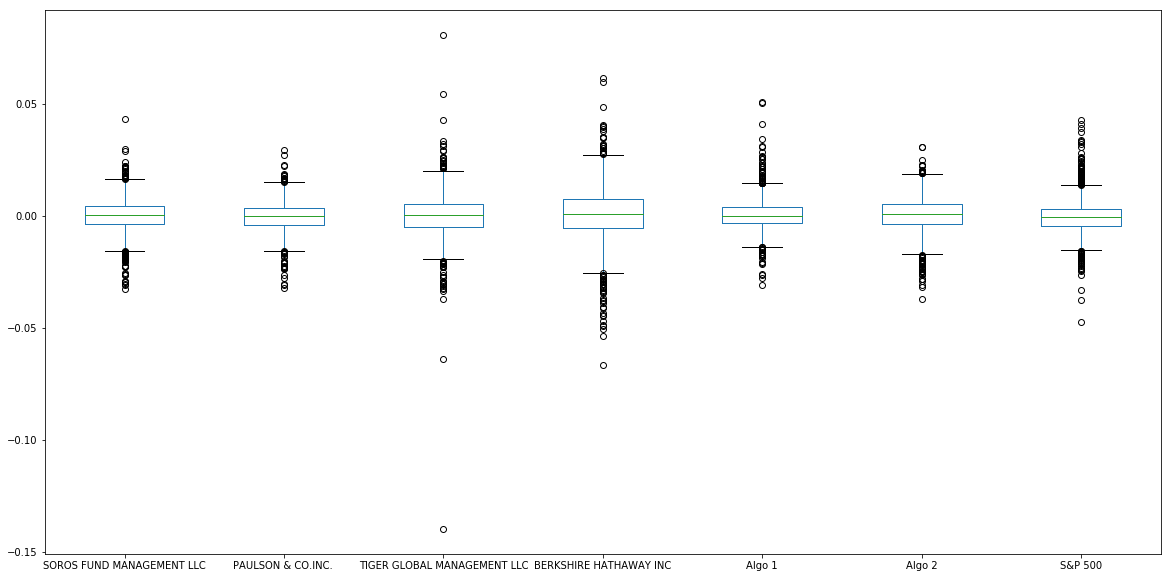

In [70]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot.box(figsize=(20,10))

In [71]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_df_std = combined_df.std()
combined_df_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [72]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combined_df_std = combined_df_std.sort_values(ascending=False)
combined_df_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [73]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
combined_df_ann_std = combined_df.std() * np.sqrt(252)
combined_df_ann_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

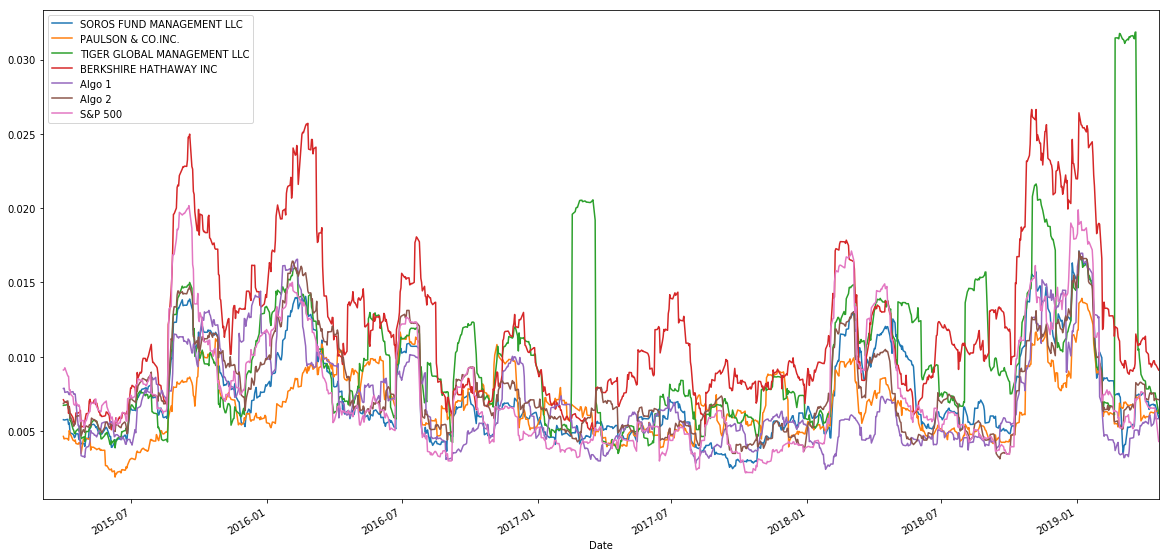

In [74]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
combined_rolling = combined_df.rolling(window=21).std().plot(figsize=(20,10))
combined_rolling

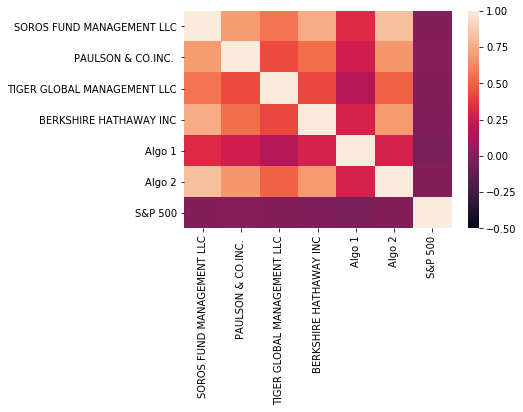

In [75]:
# Correlation
# YOUR CODE HERE
correlation = combined_df.corr()
sns.heatmap(correlation, vmin=-0.5, vmax=1)

-0.030149214542337772
AxesSubplot(0.125,0.2;0.775x0.68)


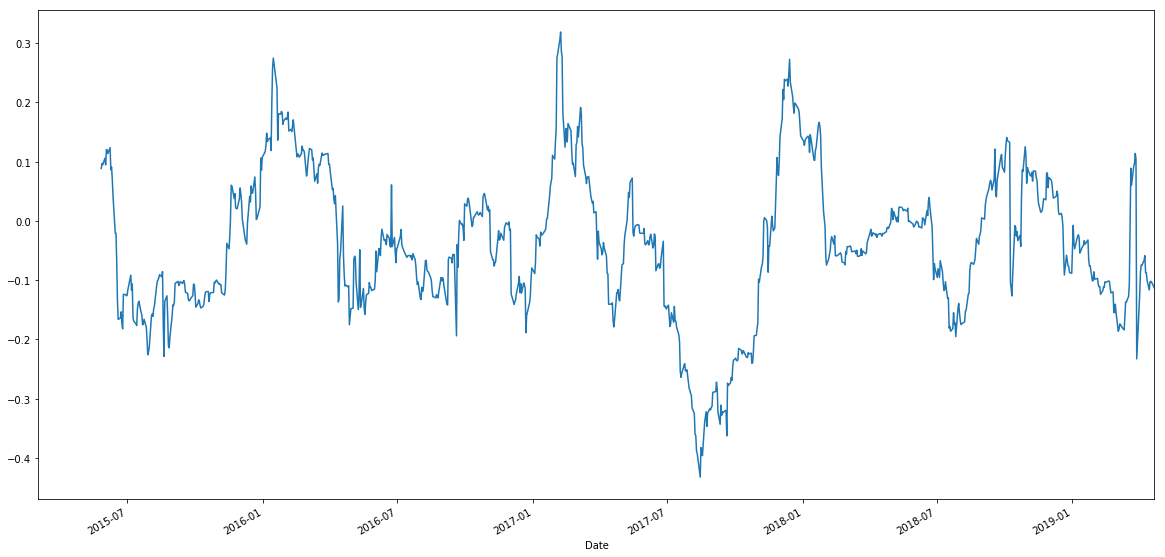

In [76]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance = combined_df["Algo 1"].cov(combined_df["S&P 500"])
variance = combined_df["S&P 500"].var()
algo1_beta = covariance / variance
rolling_algo1_covariance = combined_df["Algo 1"].rolling(window=60).cov(combined_df["S&P 500"])
rolling_variance = combined_df["S&P 500"].rolling(window=60).var()
rolling_algo1_beta = rolling_algo1_covariance / rolling_variance
rolling_beta_plot = rolling_algo1_beta.plot(figsize=(20, 10))
print(algo1_beta)
print(rolling_beta_plot)

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [77]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [78]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
combined_df_sharpe = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
combined_df_sharpe

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

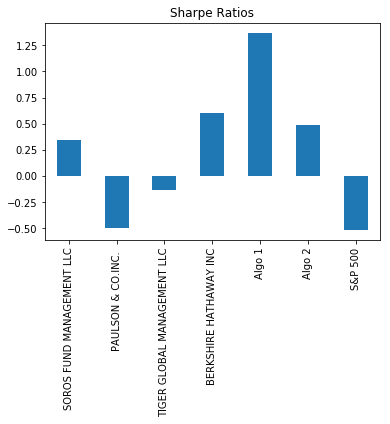

In [79]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
combined_df_sharpe.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [80]:
# Read the first stock
# YOUR CODE HERE
bx_csv = Path("../Resources/BX.csv")
bx_df = pd.read_csv(bx_csv, index_col='date', parse_dates=True, infer_datetime_format=True).sort_index(ascending=True)
bx_df = bx_df["close"]
bx_df.head()

date
2018-02-21    34.04
2018-02-22    34.02
2018-02-23    34.26
2018-02-26    34.45
2018-02-27    34.20
Name: close, dtype: float64

In [81]:
# Read the second stock
# YOUR CODE HERE
cmg_csv = Path("../Resources/CMG.csv")
cmg_df = pd.read_csv(cmg_csv, index_col='date', parse_dates=True, infer_datetime_format=True).sort_index(ascending=True)
cmg_df = cmg_df["close"]
cmg_df.head()

date
2018-02-21    320.96
2018-02-22    313.91
2018-02-23    315.82
2018-02-26    311.89
2018-02-27    319.15
Name: close, dtype: float64

In [82]:
# Read the third stock
# YOUR CODE HERE
el_csv = Path("../Resources/EL.csv")
el_df = pd.read_csv(el_csv, index_col='date', parse_dates=True, infer_datetime_format=True).sort_index(ascending=True)
el_df = el_df["close"]
el_df.head()

date
2018-02-21    139.82
2018-02-22    140.15
2018-02-23    142.39
2018-02-26    143.29
2018-02-27    139.78
Name: close, dtype: float64

In [83]:
# Read the fourth stock
# YOUR CODE HERE
mktx_csv = Path("../Resources/MKTX.csv")
mktx_df = pd.read_csv(mktx_csv, index_col='date', parse_dates=True, infer_datetime_format=True).sort_index(ascending=True)
mktx_df = mktx_df["close"]
mktx_df.head()

date
2018-02-21    201.99
2018-02-22    199.40
2018-02-23    197.68
2018-02-26    199.67
2018-02-27    201.01
Name: close, dtype: float64

In [84]:
# Read the fifth stock
# YOUR CODE HERE
shop_csv = Path("../Resources/SHOP.csv")
shop_df = pd.read_csv(shop_csv, index_col='date', parse_dates=True, infer_datetime_format=True).sort_index(ascending=True)
shop_df = shop_df["close"]
shop_df.head()

date
2018-02-21    132.90
2018-02-22    134.18
2018-02-23    137.00
2018-02-26    136.27
2018-02-27    137.66
Name: close, dtype: float64

In [85]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
mybasket_df = pd.concat([bx_df, cmg_df, el_df, mktx_df, shop_df], axis=1, join="inner")
mybasket_df.head()

,close,close,close,close,close
date,,,,,
2018-02-21,34.04,320.96,139.82,201.99,132.90
2018-02-22,34.02,313.91,140.15,199.40,134.18
2018-02-23,34.26,315.82,142.39,197.68,137.00
2018-02-26,34.45,311.89,143.29,199.67,136.27
2018-02-27,34.20,319.15,139.78,201.01,137.66


In [86]:
# Reset the index
# YOUR CODE HERE
mybasket_df.reset_index()
mybasket_df.head()

,close,close,close,close,close
date,,,,,
2018-02-21,34.04,320.96,139.82,201.99,132.90
2018-02-22,34.02,313.91,140.15,199.40,134.18
2018-02-23,34.26,315.82,142.39,197.68,137.00
2018-02-26,34.45,311.89,143.29,199.67,136.27
2018-02-27,34.20,319.15,139.78,201.01,137.66


In [87]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
mybasket_df.columns = ["BX", "CMG", "EL", "MKTX", "SHOP"]

In [88]:
# Drop Nulls
# YOUR CODE HERE
mybasket_df = mybasket_df.pct_change()
mybasket_df.dropna(inplace=True)
mybasket_df.head()

,BX,CMG,EL,MKTX,SHOP
date,,,,,
2018-02-22,-0.000588,-0.021965,0.002360,-0.012822,0.009631
2018-02-23,0.007055,0.006085,0.015983,-0.008626,0.021017
2018-02-26,0.005546,-0.012444,0.006321,0.010067,-0.005328
2018-02-27,-0.007257,0.023277,-0.024496,0.006711,0.010200
2018-02-28,-0.005848,-0.002319,-0.009586,0.006915,0.003995


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

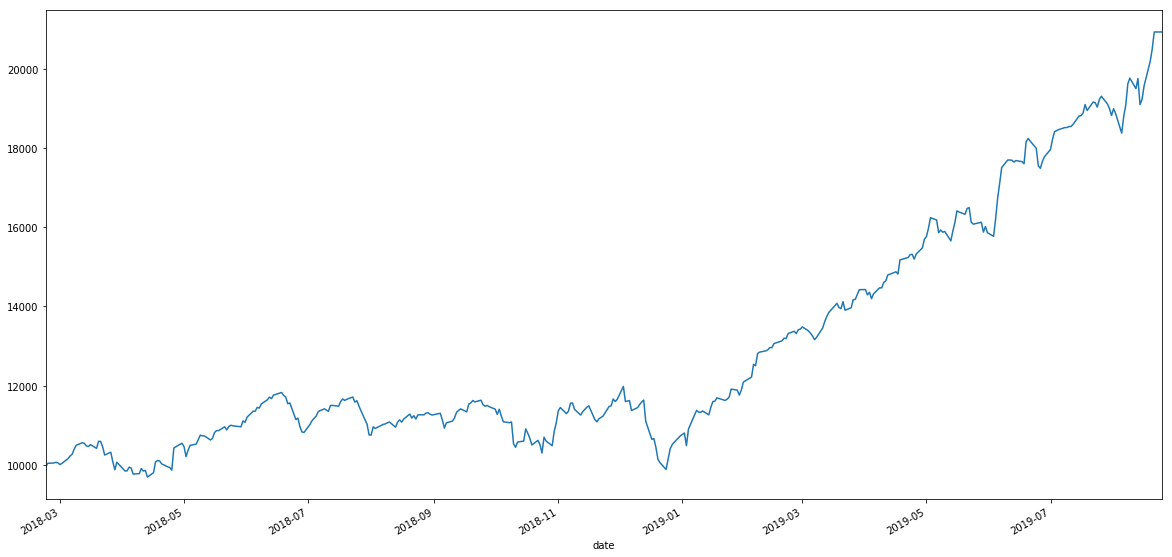

In [89]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
# YOUR CODE HERE

mybasket_df_returns = mybasket_df.dot(weights)
mybasket_df_returns.head()

initial_investment = 10000
mybasket_cumulative_returns = (1 + mybasket_df_returns).cumprod()
mybasket_cumulative_profits = (initial_investment * mybasket_cumulative_returns)
mybasket_cumulative_profits.plot(figsize=(20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [90]:
# YOUR CODE HERE
aggregate_portfolio = pd.concat([combined_df, mybasket_df_returns], axis="columns", join="inner").rename(columns = {0:'Borna'})
aggregate_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Borna
2018-02-22,-0.004249,-0.002516,0.001626,-0.000676,0.002146,-0.000010,-0.015775,-0.004677
2018-02-23,0.013610,0.005862,0.018408,0.016526,0.000155,0.010247,-0.011620,0.008303
2018-02-26,0.003984,0.006145,0.009546,-0.001412,-0.001839,0.005430,0.012870,0.000832
2018-02-27,-0.018335,-0.007856,-0.021110,-0.012554,-0.002081,-0.011960,0.011220,0.001687
2018-02-28,-0.010668,-0.011224,-0.011477,-0.002810,0.011080,-0.012156,0.013504,-0.001369


In [91]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
aggregate_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Borna                          0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [92]:
# Risk
# YOUR CODE HERE
aggregate_std_dev = aggregate_portfolio.std() * np.sqrt(252)
aggregate_std_dev

SOROS FUND MANAGEMENT LLC      0.150945
PAULSON & CO.INC.              0.116143
TIGER GLOBAL MANAGEMENT LLC    0.227071
BERKSHIRE HATHAWAY INC         0.233854
Algo 1                         0.126133
Algo 2                         0.137071
S&P 500                        0.156902
Borna                          0.211718
dtype: float64

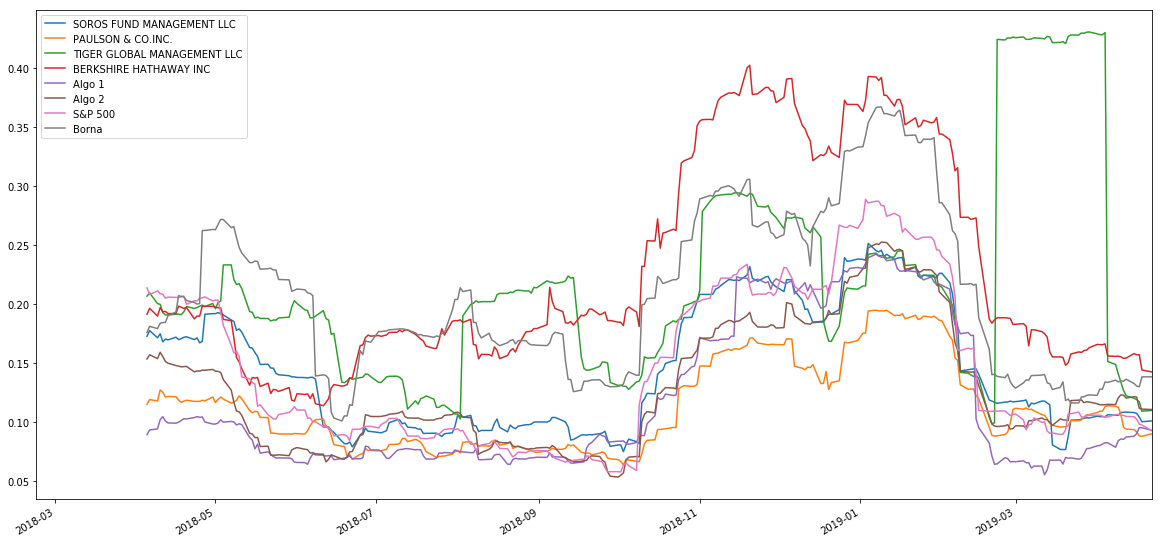

In [93]:
# Rolling
# YOUR CODE HERE
aggregate_portfolio_rolling_std = aggregate_portfolio.rolling(window=30).std() * np.sqrt(252)
aggregate_portfolio_rolling_std.plot(figsize=(20,10))

-0.03332466653432099
AxesSubplot(0.125,0.2;0.775x0.68)


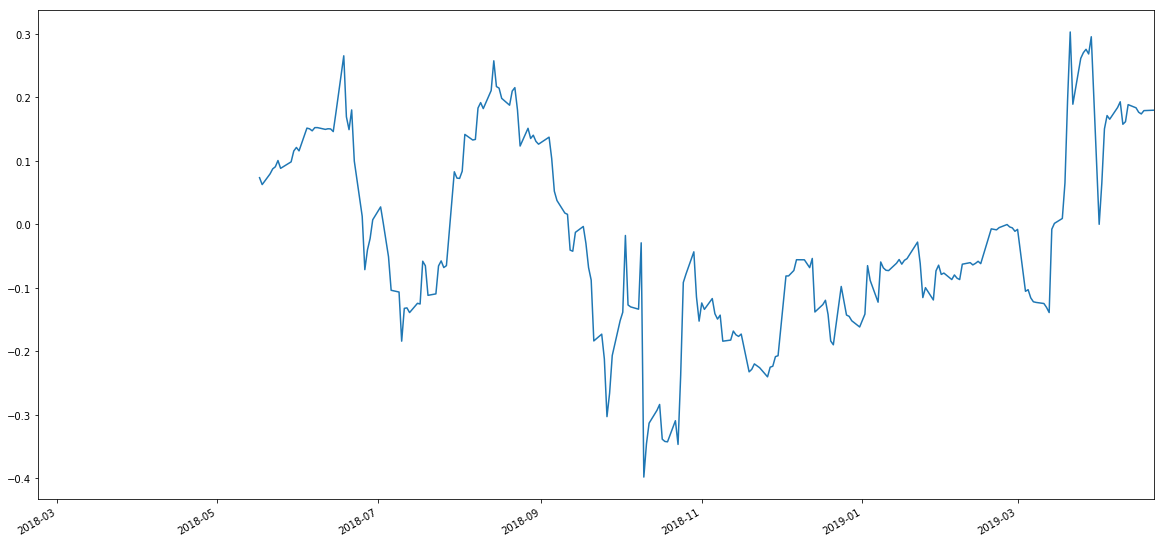

In [99]:
# Beta
# YOUR CODE HERE
covariance = aggregate_portfolio["Borna"].cov(aggregate_portfolio["S&P 500"])
variance = aggregate_portfolio["S&P 500"].var()
borna_beta = covariance / variance
rolling_borna_covariance = aggregate_portfolio["Borna"].rolling(window=60).cov(aggregate_portfolio["S&P 500"])
rolling_variance = aggregate_portfolio["S&P 500"].rolling(window=60).var()
rolling_borna_beta = rolling_borna_covariance / rolling_variance
rolling_beta_plot = rolling_borna_beta.plot(figsize=(20, 10))
print(borna_beta)
print(rolling_beta_plot)

In [95]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
aggregate_portfolio_sharpe = (aggregate_portfolio.mean() * 252) / (aggregate_portfolio.std() * np.sqrt(252))
aggregate_portfolio_sharpe

SOROS FUND MANAGEMENT LLC     -0.029045
PAULSON & CO.INC.              0.005724
TIGER GLOBAL MANAGEMENT LLC   -1.183733
BERKSHIRE HATHAWAY INC         0.227259
Algo 1                         2.049561
Algo 2                         0.125291
S&P 500                       -0.370341
Borna                          1.822739
dtype: float64

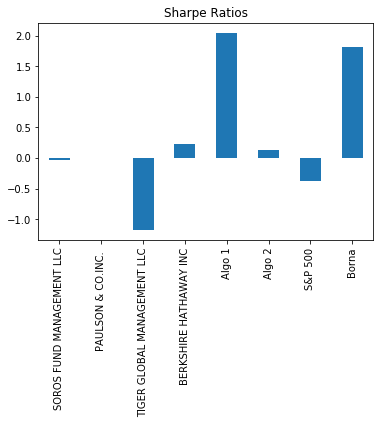

In [96]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
aggregate_portfolio_sharpe.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

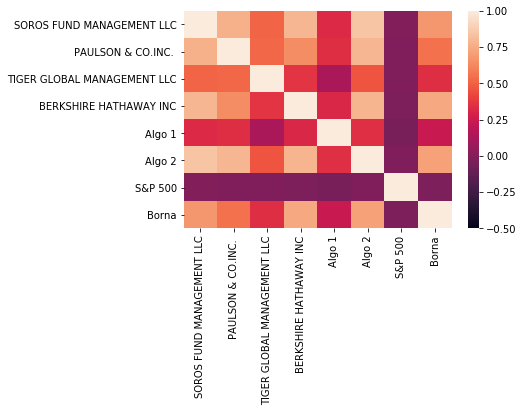

In [97]:
# YOUR CODE HERE
aggregate_correlation = aggregate_portfolio.corr()
sns.heatmap(aggregate_correlation, vmin=-0.5, vmax=1)